# Student Performance Indicator

 Life Cycle of Machine Learning :

1. Understanding Problem Statement
2. Data Collection
3. Data Checks to perform 
4. EDA (Exploratory Data Analysis)
5. Data Preprocessing
6. Model Training
7. Choose Best Model

# Importing Data and Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("/kaggle/input/student-performance-data/stud.csv")

In [3]:
data.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [4]:
data.shape

(1000, 8)

Dataset contains 1000 Rows and 8 columns.

In [5]:
data.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Dataset contains 8 columns such as gender, race_ethnicity,parental_level_of_education, lunch, test_preparation_course, math_score, reading_score, writing_score

## Dataset Information 

1. gender : sex of students -> (Male/female)
2. race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
3. parental level of education : parents' final education ->(bachelor's degree,some college,master's  degree,associate's degree,high school)
4. lunch : having lunch before test (standard or free/reduced)
5. test preparation course : complete or not complete before test
6. math score
7. reading score
8. writing score

# Steps : 
1. Check Missing values
2. Check Duplicates
3. Check data type
4. Check the number of unique values of each column
5. Check statistics of data set
6. Check various categories present in the different categorical column

# Checking Missing Values

In [6]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are No Missing Values in the dataset.

# Checking Duplicates

In [7]:
data.duplicated().sum()

0

There are No Duplicate Values in the dataset.

# Checking Data Types

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Gender, race_ethnicity, parental_level_of_education, lunch, test_preparaton_course are Object Dtype
and Math_score, reading_score, writing_score are int Dtype.

# Checking the No.of Unique Values in the dataset

In [9]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
data.nunique().sum()

247

Total 247 Unique Values present in the dataset.

# Checking the statistics of dataset

In [11]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights :

1. From above Statistics, mean for math_score, reading_score, writing_score close to each other - between 66 to 68.
2. standard Deviation is also close to each other - between 14 to 15.
3. Minimum value is 0 for math_score and Maximum Value is 100 for all three.

# Exploring the dataset

In [12]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
print("Categories in 'Gender' Variable:    ",end=" ")
print(data['gender'].unique())
print("Categories in 'race_ethnicity' Variable:    ",end=" ")
print(data['race_ethnicity'].unique())
print("Categories in 'parental_level_of_education' Variable:    ",end=" ")
print(data['parental_level_of_education'].unique())
print("Categories in 'lunch' Variable:    ",end=" ")
print(data['lunch'].unique())
print("Categories in 'test_preparation_course' Variable:    ",end=" ")
print(data['test_preparation_course'].unique())


Categories in 'Gender' Variable:     ['female' 'male']
Categories in 'race_ethnicity' Variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' Variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' Variable:     ['standard' 'free/reduced']
Categories in 'test_preparation_course' Variable:     ['none' 'completed']


Define Numerical and Categorical features

In [14]:
numerical_features=[feature for feature in data.columns if data[feature].dtype != 'O']
Categorical_features=[feature for feature in data.columns if data[feature].dtype == 'O']
print("Numerical Features are {}".format(numerical_features))
print("Categorical Features are {}".format(Categorical_features))

Numerical Features are ['math_score', 'reading_score', 'writing_score']
Categorical Features are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


# Adding columns : Total_score and Average_score

In [15]:
data['total_score']=data['math_score']+data['reading_score']+data['writing_score']
data['Average']=data['total_score']/3

In [16]:
data.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


# No.of Students with Full Marks in math_score, reading_score, writing_score

In [17]:
math_full=data[data['math_score']==100]['Average'].count()
reading_full=data[data['reading_score']==100]['Average'].count()
writing_full=data[data['writing_score']==100]['Average'].count()

print("Number of Students with Full marks in Math_score : {}".format(math_full))
print("Number of Students with Full marks in reading_score : {}".format(reading_full))
print("Number of Students with Full marks in writing_score : {}".format(writing_full))

Number of Students with Full marks in Math_score : 7
Number of Students with Full marks in reading_score : 17
Number of Students with Full marks in writing_score : 14


# Data Visualization

<Axes: xlabel='Average', ylabel='Count'>

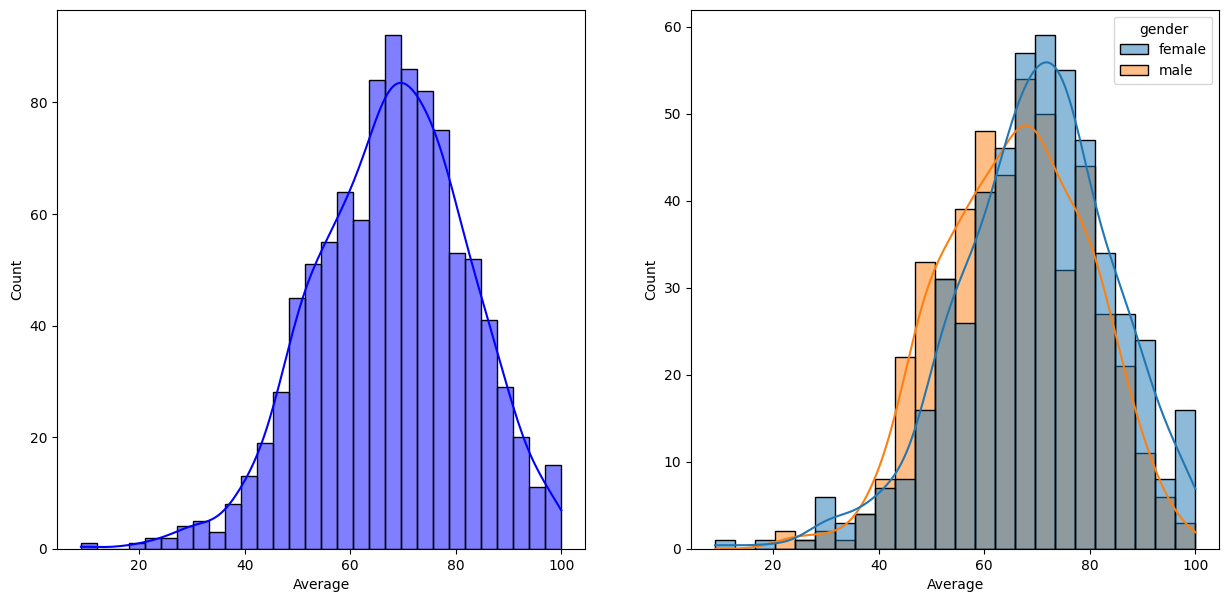

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='Average',bins=30,kde=True,color='blue')
plt.subplot(122)
sns.histplot(data,x='Average',kde=True,hue='gender')

<Axes: xlabel='total_score', ylabel='Count'>

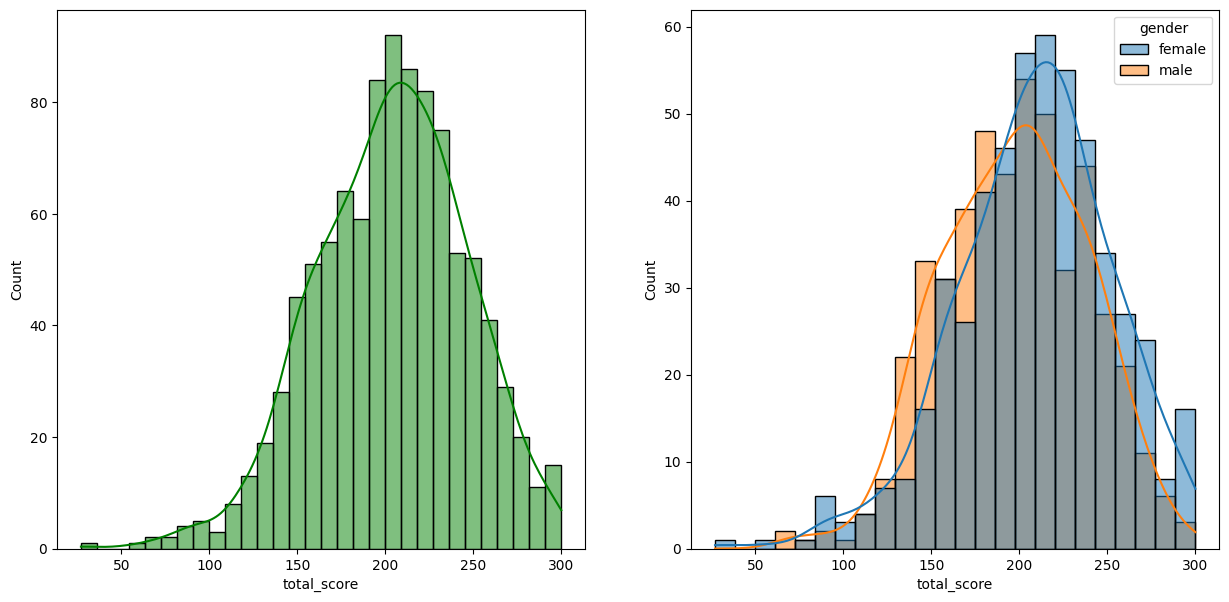

In [19]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=data,x='total_score',bins=30,kde=True,color='green')
plt.subplot(122)
sns.histplot(data=data,x='total_score',kde=True,hue='gender')

Insights : Female Students perform well in exam then male students.

<Axes: xlabel='Average', ylabel='Count'>

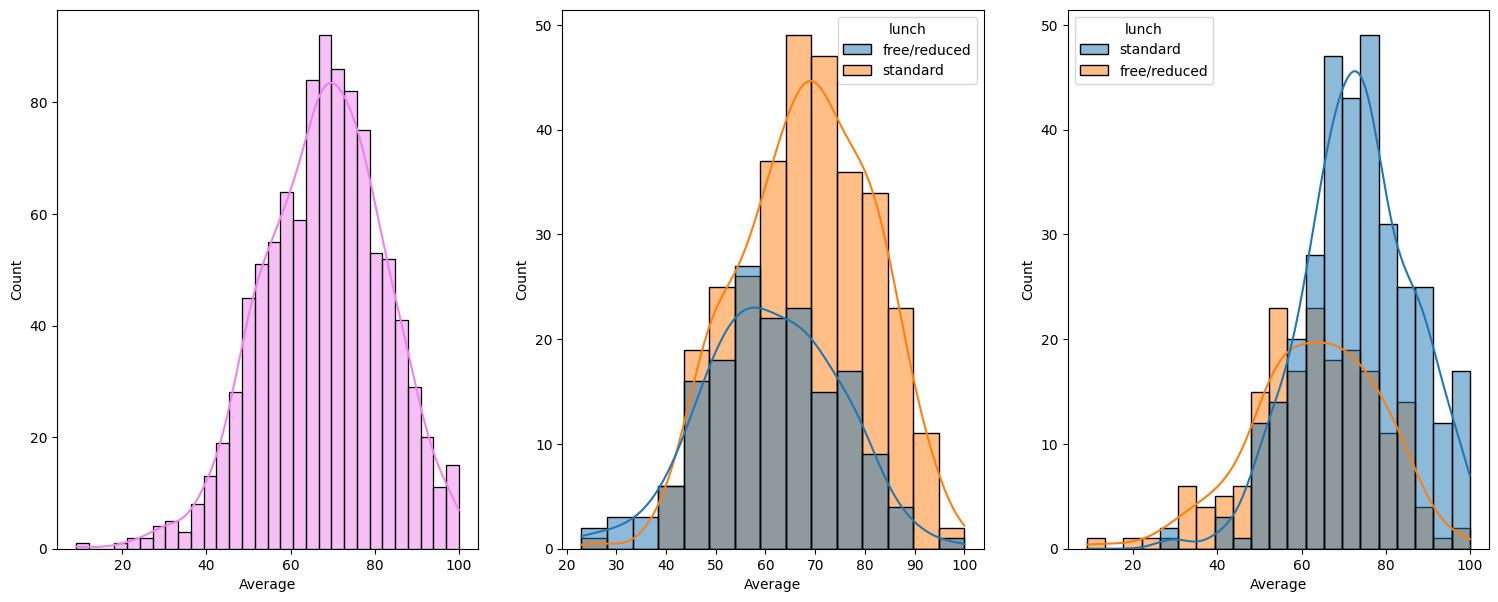

In [20]:
fig, axs=plt.subplots(1,3,figsize=(25,7))
plt.subplot(1,4,1)
sns.histplot(data=data,x='Average',bins=30,kde=True,color='violet')
plt.subplot(1,4,2)
sns.histplot(data=data[data.gender=='male'],x='Average',kde=True,hue='lunch')
plt.subplot(1,4,3)
sns.histplot(data=data[data.gender=='female'],x='Average',kde=True,hue='lunch')

Insight : 
1. Standard lunch helps to perform well in exams.
2. Standard lunch helps to perform well in exams for both genders (Male and female).

<Axes: xlabel='Average', ylabel='Count'>

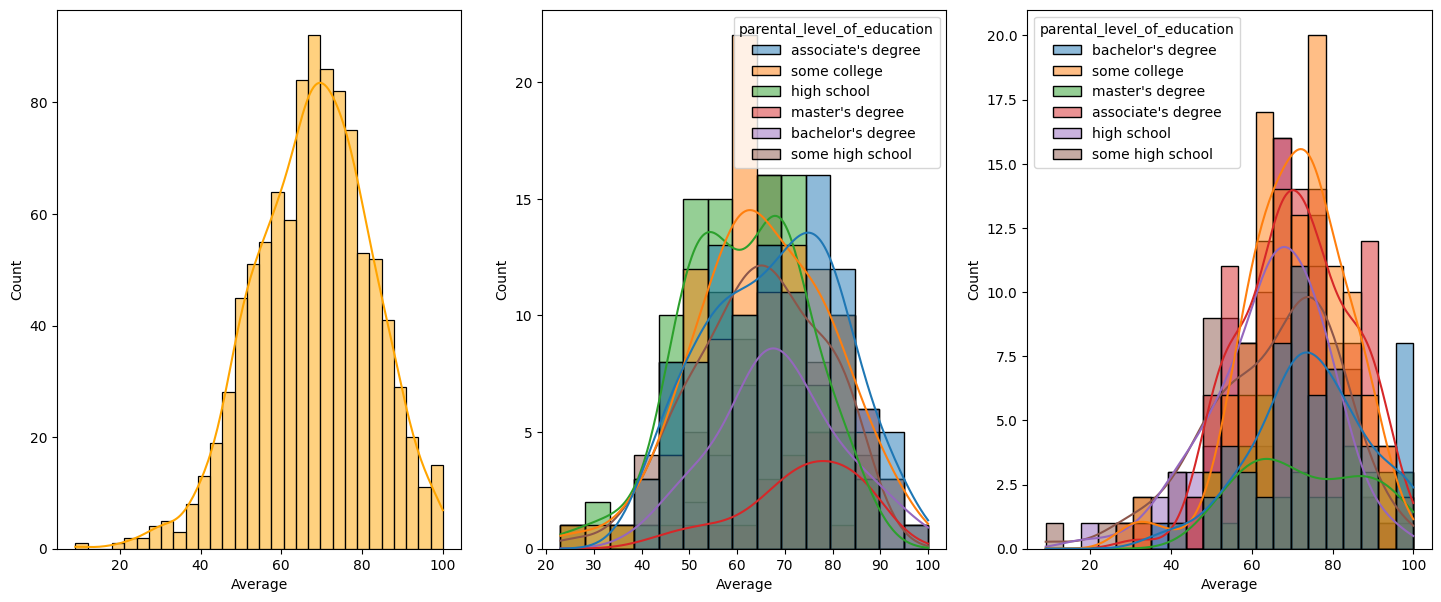

In [21]:
plt.subplots(1,3,figsize=(24,7))
plt.subplot(141)
sns.histplot(data=data,x='Average',bins=30,kde=True,color='orange')
plt.subplot(142)
sns.histplot(data=data[data.gender=='male'],x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=data[data.gender=='female'],x='Average',kde=True,hue='parental_level_of_education')

Insights :
1. In general, Parents education dont help student to perform well in exam
2. when you observe in Chart 2, we can say that whose education is of Associate's degree or master's degree their child tend to perform well in exams.
3. when you observe in chart 3, we can say that for female students has no effect with parental education.

<Axes: xlabel='Average', ylabel='Count'>

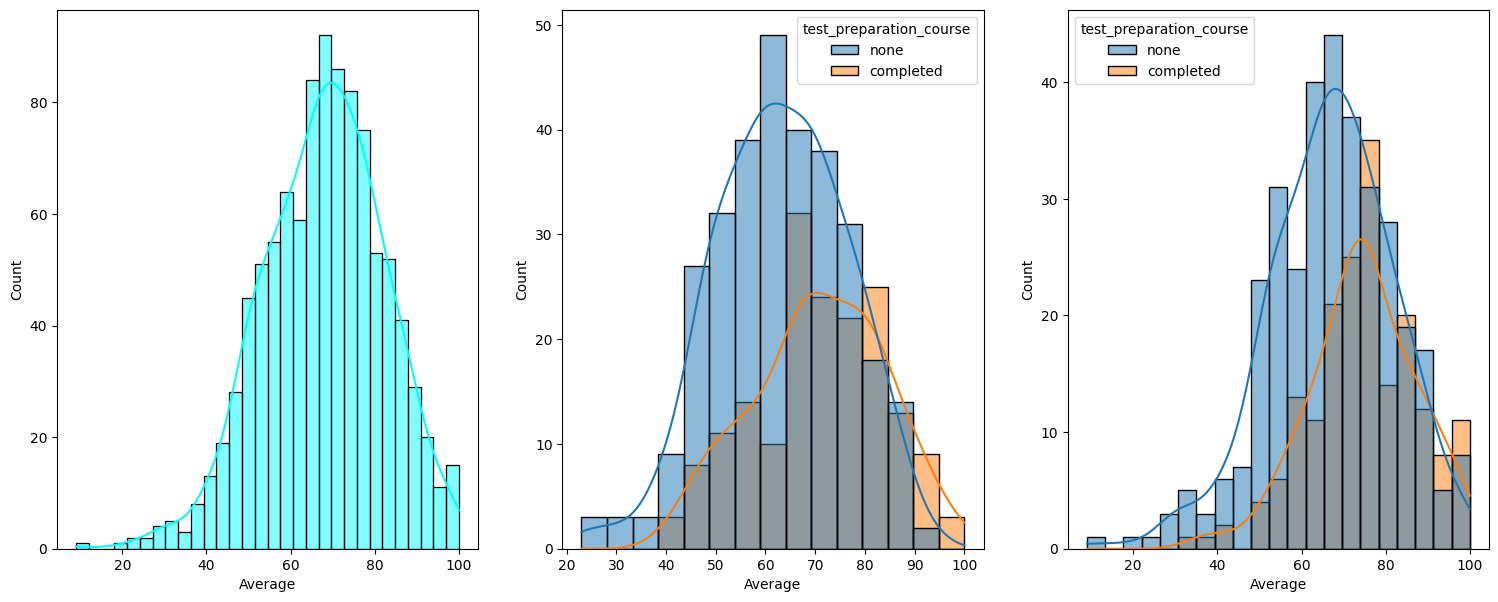

In [22]:
plt.subplots(1,3,figsize=(25,7))
plt.subplot(141)
sns.histplot(data=data,x='Average',bins=30,kde=True,color='cyan')
plt.subplot(142)
sns.histplot(data=data[data.gender=='male'],x='Average',kde=True,hue='test_preparation_course')
plt.subplot(143)
sns.histplot(data=data[data.gender=='female'],x='Average',kde=True,hue='test_preparation_course')


Insight:
1. Students performing well in exam who are all completing the test prepartion course.

<Axes: xlabel='Average', ylabel='Count'>

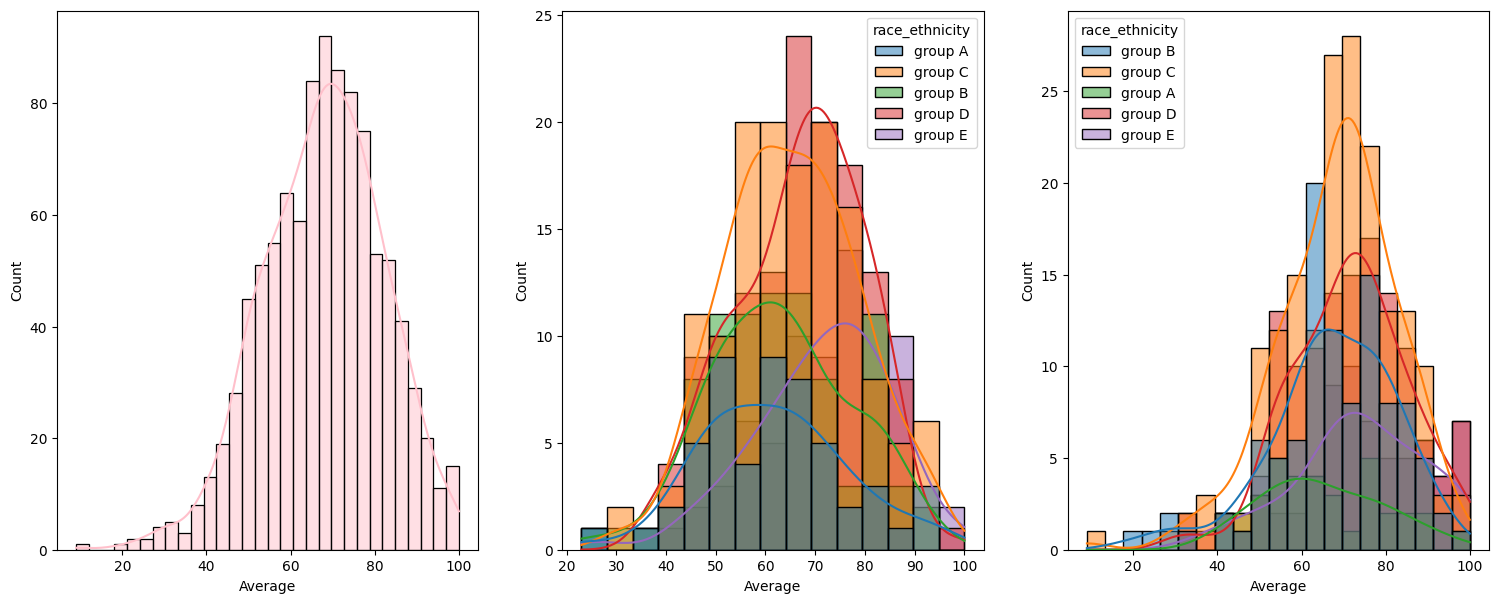

In [23]:
plt.subplots(1,3,figsize=(25,7))
plt.subplot(141)
sns.histplot(data=data,x='Average',bins=30,kde=True,color='pink')
plt.subplot(142)
sns.histplot(data=data[data.gender=='male'],x='Average',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=data[data.gender=='female'],x='Average',kde=True,hue='race_ethnicity')

Insights: Students from Group B and Group C tends to perform poorly in exams.

# Maximum score of students in all three subjects (Math score, Reading score, Writing score)

<Axes: title={'center': 'Writing Score'}, ylabel='writing_score'>

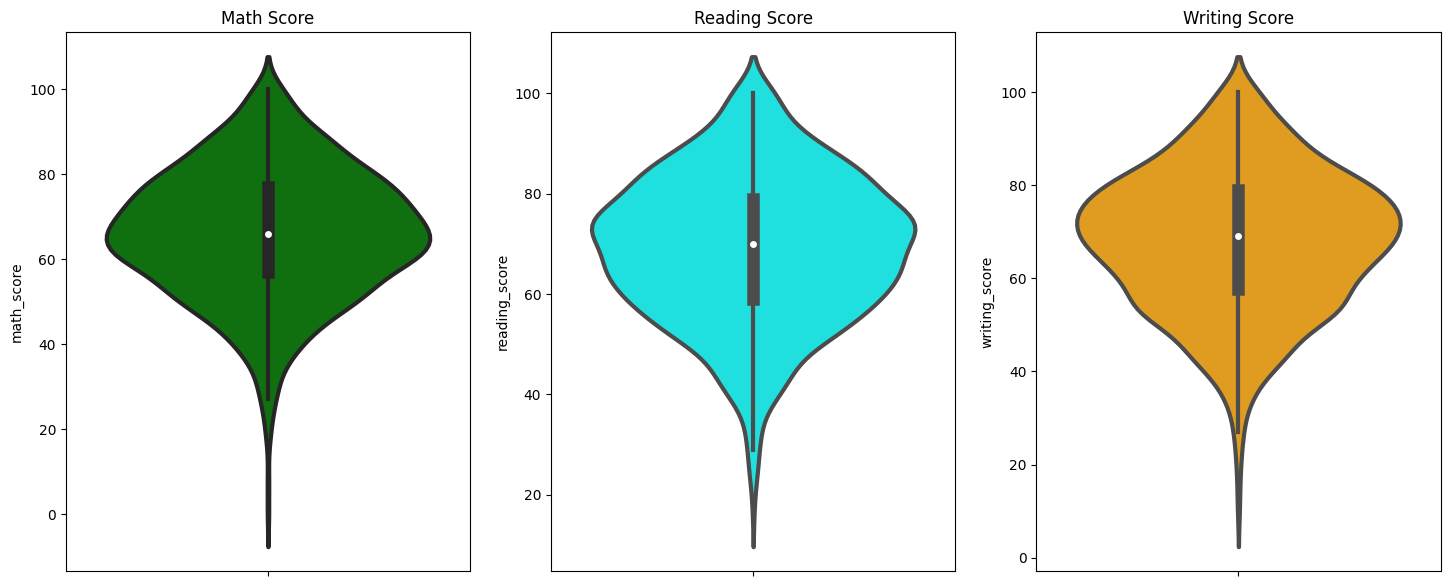

In [24]:
plt.figure(figsize=(24,7))
plt.subplot(141)
plt.title("Math Score")
sns.violinplot(y='math_score',data=data,color='green',linewidth=3)
plt.subplot(142)
plt.title("Reading Score")
sns.violinplot(y='reading_score',data=data,color='cyan',linewidth=3)
plt.subplot(143)
plt.title("Writing Score")
sns.violinplot(y='writing_score',data=data,color='orange',linewidth=3)


(-1.25, 1.25, -1.25, 1.25)

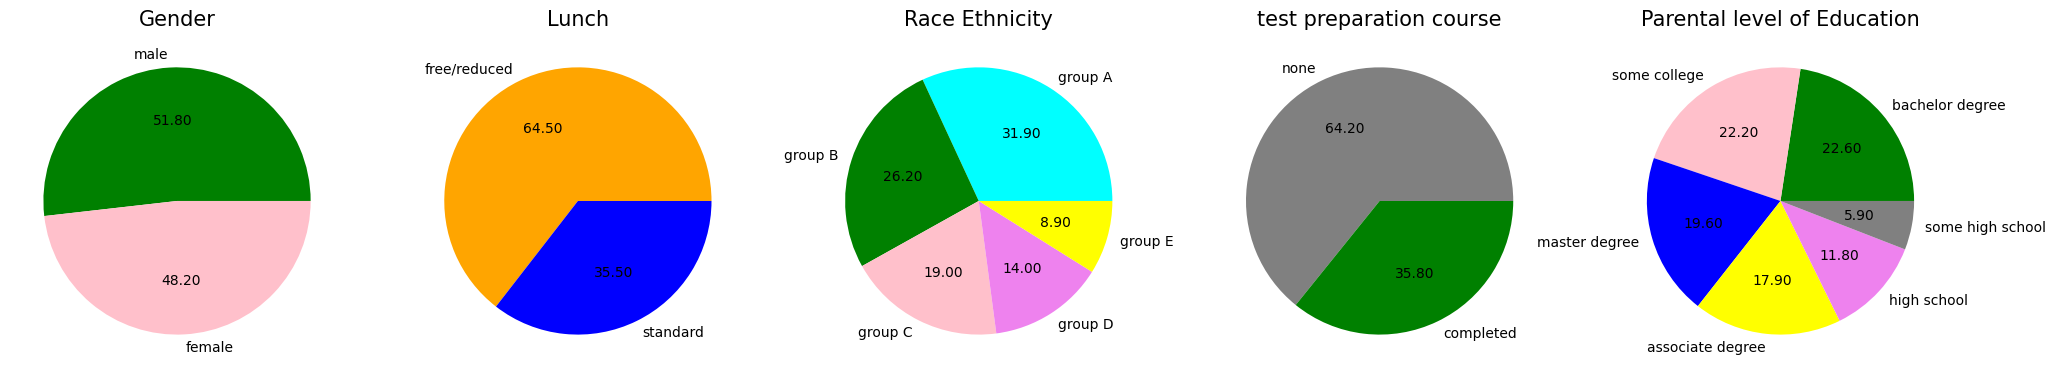

In [25]:
plt.rcParams['figure.figsize']=(25,12)

plt.subplot(151)
size=data['gender'].value_counts()
labels=['male','female']
colors=['green','pink']

plt.pie(size,colors=colors,labels=labels,autopct='%.2f')
plt.title('Gender',fontsize=15)
plt.axis('off')

plt.subplot(152)
size=data['lunch'].value_counts()
labels=['free/reduced','standard']
colors=['orange','blue']

plt.pie(size,colors=colors,labels=labels,autopct='%.2f')
plt.title('Lunch',fontsize=15)
plt.axis('off')

plt.subplot(153)
size=data['race_ethnicity'].value_counts()
labels=['group A','group B','group C','group D','group E']
colors=['cyan','green','pink','violet','yellow']
plt.pie(size,colors=colors,labels=labels,autopct='%.2f')
plt.title('Race Ethnicity',fontsize=15)
plt.axis('off')


plt.subplot(154)
size=data['test_preparation_course'].value_counts()
labels=['none','completed']
colors=['grey','green']
plt.pie(size,colors=colors,labels=labels,autopct='%.2f')
plt.title('test preparation course',fontsize=15)
plt.axis('off')


plt.subplot(155)
size=data['parental_level_of_education'].value_counts()
labels=['bachelor degree','some college','master degree','associate degree','high school','some high school']
colors=['green','pink','blue','yellow','violet','grey']
plt.pie(size,colors=colors,labels=labels,autopct='%.2f')
plt.title('Parental level of Education',fontsize=15)
plt.axis('off')


Insights: 
1. No.of male and female students are almost equal
2. No.of students who have standard lunch are greater
3. No.of Students are greater in Group B race ethnicity
4. No.of Students who are not enrolled in test preparation course
5. No.of Students whose parental level of education is greater for 'Some college' and followed by 'bachelor degree'

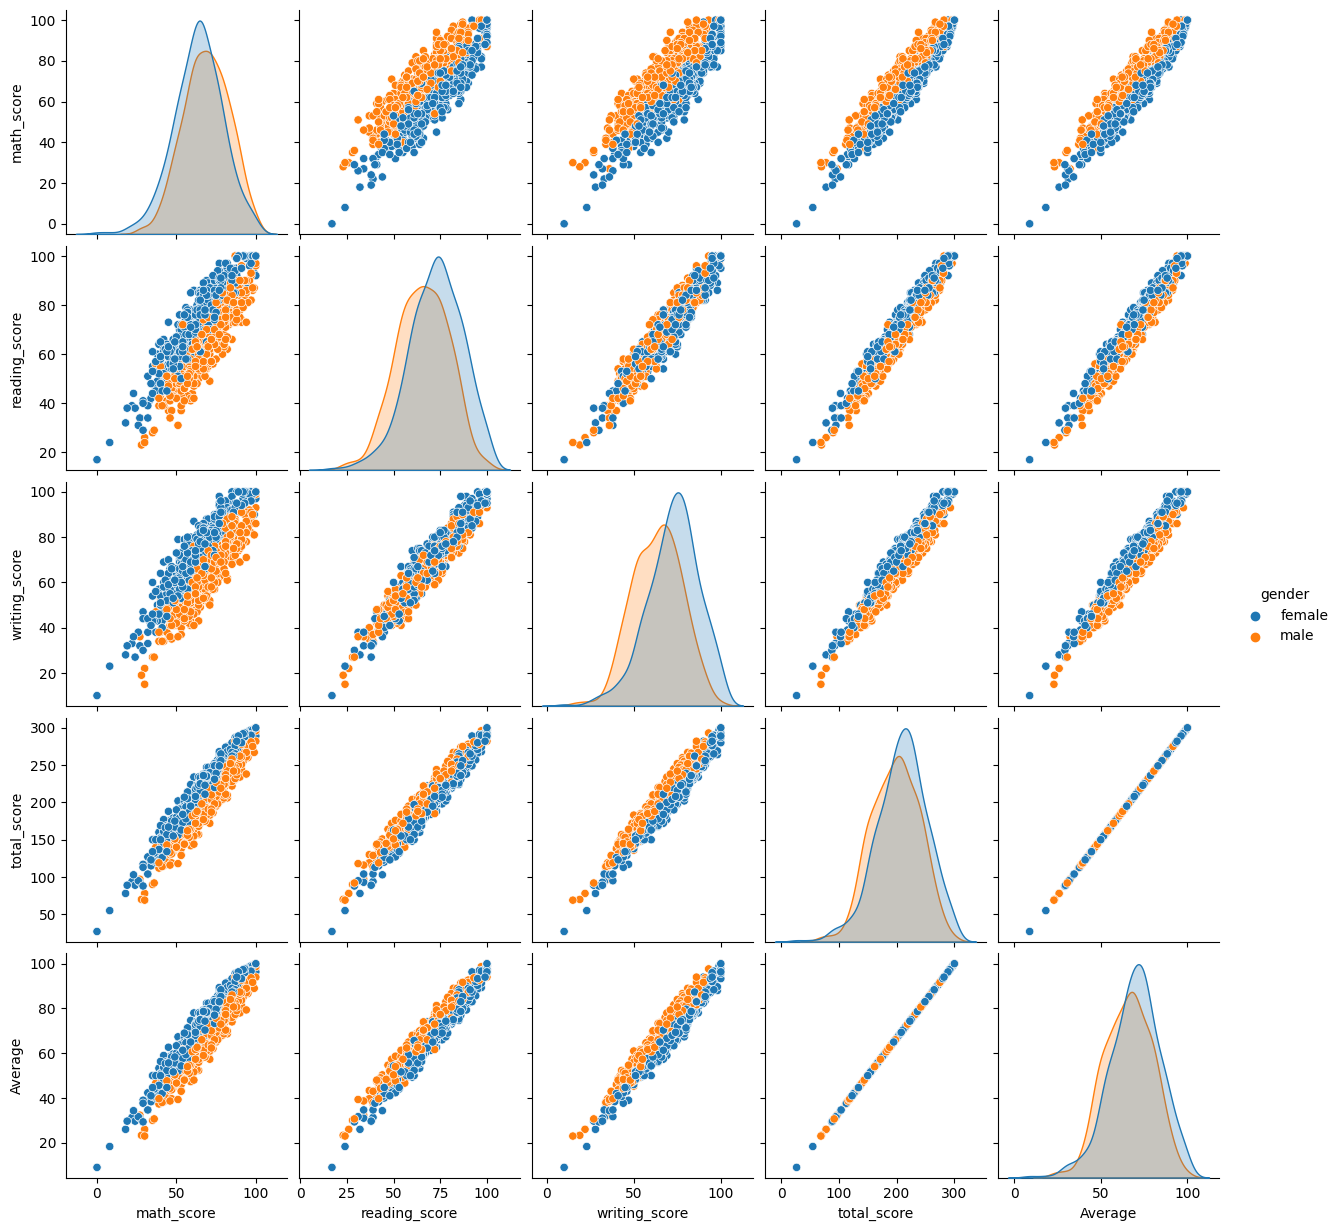

In [26]:
sns.pairplot(data,hue='gender')

# Model Training

In [27]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import warnings

In [28]:
data.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [29]:
data.shape

(1000, 10)

In [30]:
x=data.drop(columns=['math_score'],axis=1)

In [31]:
x.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,74,218,72.666667
1,female,group C,some college,standard,completed,90,88,247,82.333333


In [32]:
y=data['math_score']

In [33]:
print(y)

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64


# Create a Column Transformer with 3 Types of transformers.

In [34]:
numerical_features=x.select_dtypes(exclude="object").columns
categorical_features=x.select_dtypes(include="object").columns

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical_transformer=StandardScaler()
OH_transformer=OneHotEncoder()

preproccesor=ColumnTransformer(
[
    ("OneHotEncoder",OH_transformer,Categorical_features),
    ("StandardScaler",numerical_transformer,numerical_features),
])

In [35]:
x=preproccesor.fit_transform(x)

In [36]:
x.shape

(1000, 21)

In [37]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


In [38]:
print(x_train.shape)
print(x_test.shape)

(700, 21)
(300, 21)


In [39]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2=r2_score(true,predicted)
    return mae,rmse,r2

In [40]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "Catboost Regressor": CatBoostRegressor(verbose=False),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)    # Train Model
    
    #Make predictions
    
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Ridge Regression
Model performance for Training set
- Root Mean Squared Error: 0.3882
- Mean Absolute Error: 0.3106
- R2 Score: 0.9993
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4109
- Mean Absolute Error: 0.3274
- R2 Score: 0.9993


Lasso Regression
Model performance for Training set
- Root Mean Squared Error: 4.6538
- Mean Absolute Error: 3.6848
- R2 Score: 0.9018
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.9626
- Mean Absolute Error: 3.9339
- R2 Score: 0.9010


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4.2054
- Mean Absolute Error: 3.3160
- R2 Score: 0.9198
-

# Results

In [41]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
0,Linear Regression,1.000000
1,Ridge Regression,0.999321
5,Catboost Regressor,0.965072
6,Random Forest Regressor,0.950124
4,XGBoost Regressor,0.949055
8,Decision Tree Regressor,0.925727
7,AdaBoost Regressor,0.911951
2,Lasso Regression,0.901020
3,K-Neighbors Regressor,0.889137


# K Neighbors Regressor

In [42]:
K_model=KNeighborsRegressor()
K_model=K_model.fit(x_train,y_train)
y_pred=K_model.predict(x_test)
score=r2_score(y_test,y_pred)*100

print("Accuracy for the model = {:.2f}".format(score))

Accuracy for the model = 88.91


Text(0, 0.5, 'Predicted')

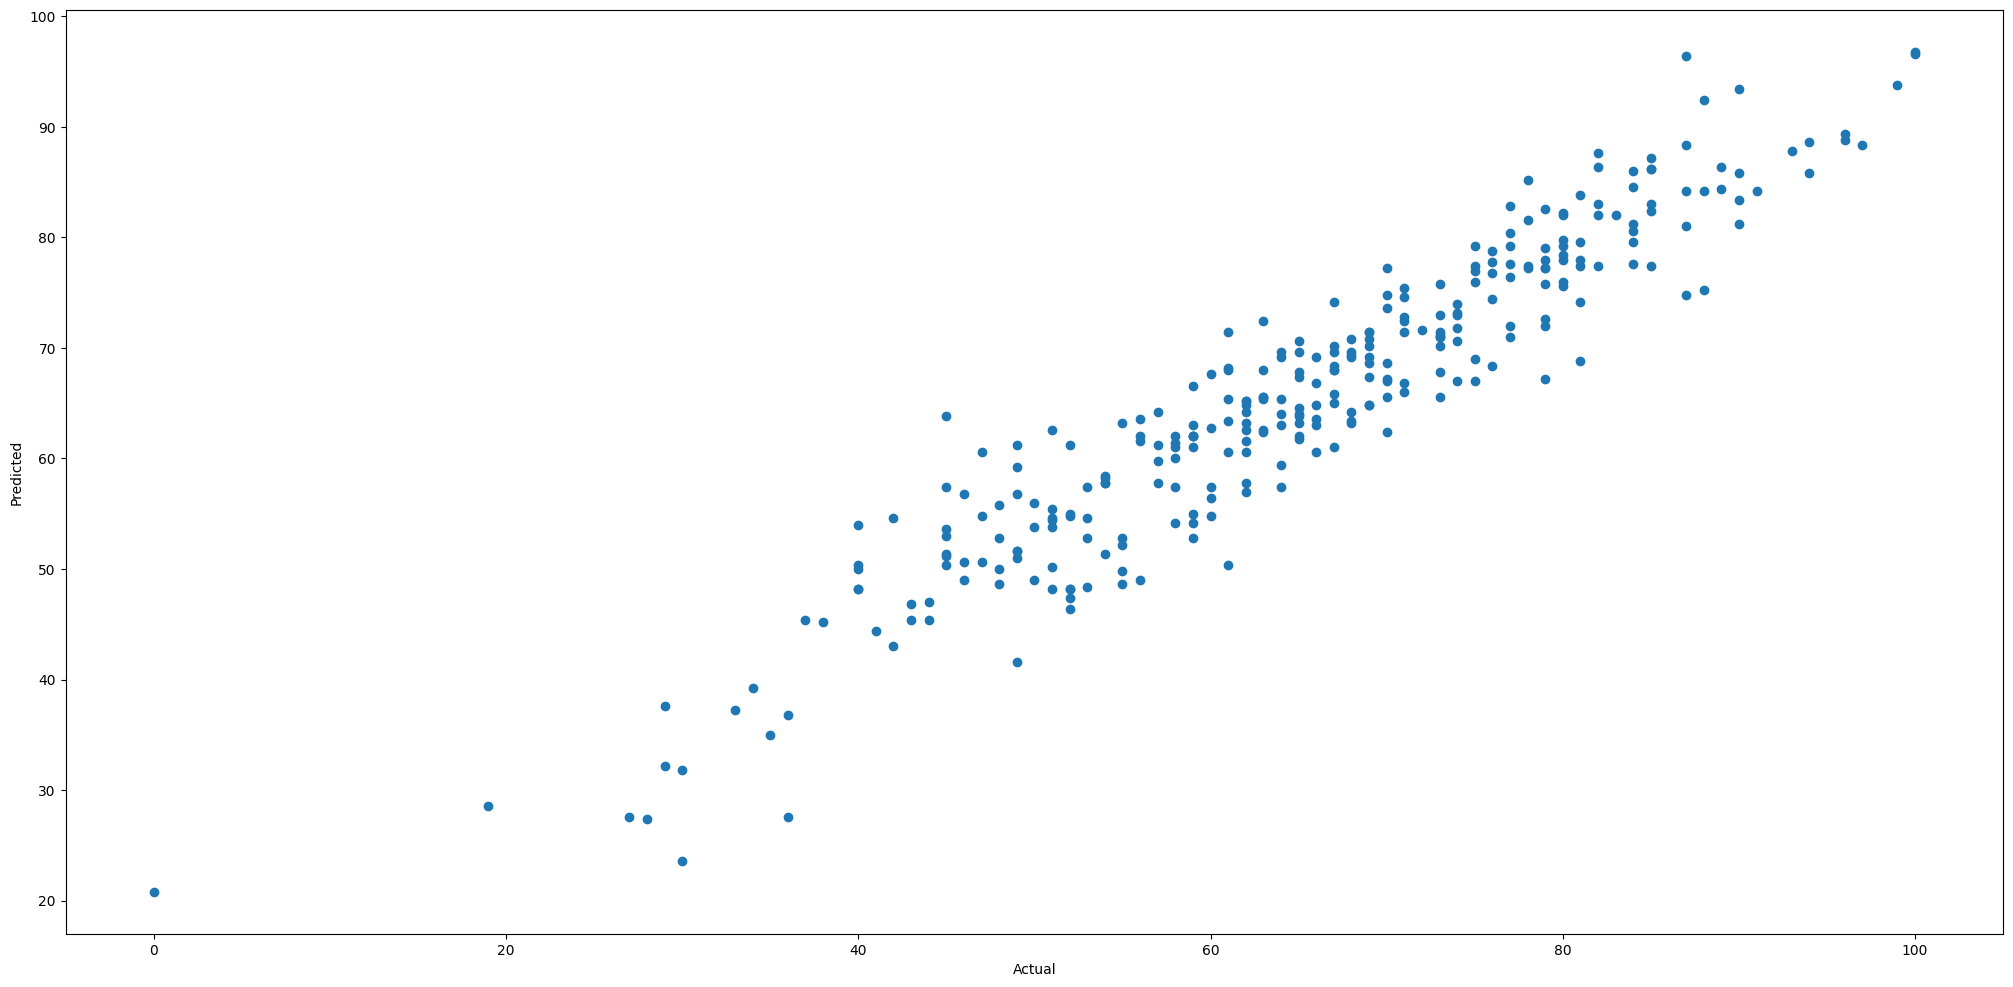

In [43]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

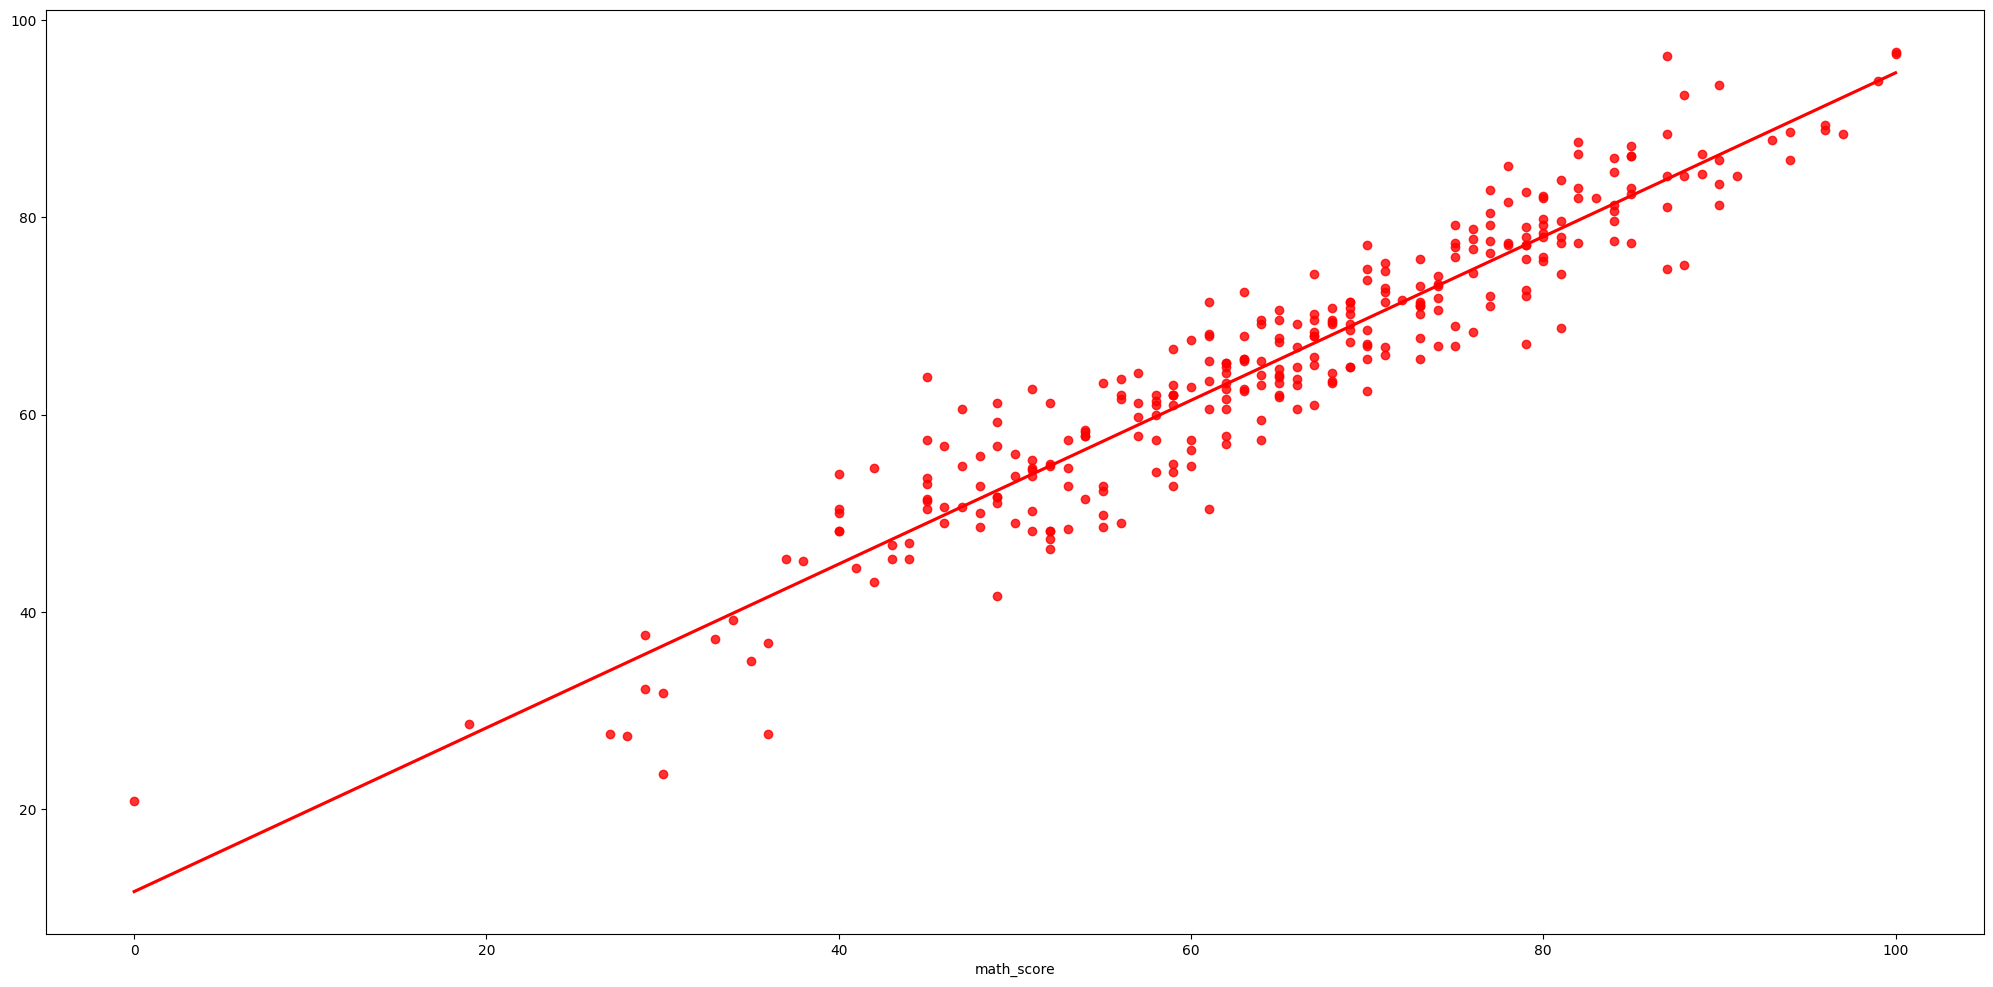

In [44]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

# Difference between Actual and Predicted Values

In [45]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,84.2,6.8
737,53,57.4,-4.4
740,80,78.4,1.6
660,74,73.2,0.8
411,84,84.6,-0.6
...,...,...,...
468,77,72.0,5.0
935,70,67.0,3.0
428,65,64.0,1.0
7,40,48.2,-8.2
